<a href="https://colab.research.google.com/github/AmmaraYounas/Data_Analysis_Practice/blob/main/UFC_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as offline



In [ ]:
pip install squarify

In [ ]:
import squarify

import random

import operator



In [ ]:


url = "https://raw.githubusercontent.com/ArsalanKhan0608/UFC-Data-Analysis/main/data.csv"
df = pd.read_csv(url)
df.head(2)

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,1,1,23.0,182.0,Trento Italy,2783,Mezzocorona Italy,Marvin Vettori,84,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1,0,0,32.0,175.0,"Careiro da Várzea, Amazonas Brazil",2208,"Pharr, Texas USA",Carlos Diego Ferreira,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue


In [ ]:
df.describe(include="all")

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
count,1477.000000,1477.000000,1474.000000,1476.000000,1471,1477.000000,1470,1477,1477.000000,978.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,1461,1477
unique,NaN,NaN,NaN,NaN,568,NaN,431,719,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4
top,NaN,NaN,NaN,NaN,Rio de Janeiro Brazil,NaN,Rio de Janeiro Brazil,Tim Means,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
freq,NaN,NaN,NaN,NaN,32,NaN,38,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720,867
mean,1.735274,0.654705,30.954545,177.451220,NaN,1964.633040,NaN,NaN,73.804333,0.036810,...,66.604167,5.527778,4.319444,5.138889,12.097222,224.965278,4.562500,263.069444,NaN,NaN
std,1.895561,1.057269,4.020311,8.561541,NaN,666.949141,NaN,NaN,14.980531,0.193748,...,94.574736,22.374419,12.854023,14.312013,36.429320,142.328509,19.698681,162.386212,NaN,NaN
min,0.000000,0.000000,20.000000,152.000000,NaN,129.000000,NaN,NaN,52.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,28.000000,172.000000,NaN,1755.000000,NaN,NaN,65.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,126.750000,0.000000,139.000000,NaN,NaN
50%,1.000000,0.000000,31.000000,177.000000,NaN,2156.000000,NaN,NaN,70.000000,0.000000,...,9.500000,0.000000,0.000000,0.000000,0.000000,232.000000,0.000000,291.000000,NaN,NaN
75%,3.000000,1.000000,34.000000,182.000000,NaN,2337.000000,NaN,NaN,84.000000,0.000000,...,109.000000,0.000000,0.000000,0.000000,2.000000,299.000000,0.000000,300.000000,NaN,NaN


In [ ]:
print("Number of records : ", df.shape[0])
print("Number of Blue fighters : ", len(df.B_ID.unique()))
print("Number of Red fighters : ", len(df.R_ID.unique()))

Number of records :  1477
Number of Blue fighters :  715
Number of Red fighters :  627


In [ ]:
df.isnull().sum(axis=0)

BPrev                                 0
BStreak                               0
B_Age                                 3
B_Height                              1
B_HomeTown                            6
                                   ... 
R__Round5_TIP_Neutral Time         1333
R__Round5_TIP_Side Control Time    1333
R__Round5_TIP_Standing Time        1333
winby                                16
winner                                0
Length: 895, dtype: int64

In [ ]:
df['B_Age'] = df['B_Age'].fillna(np.mean(df['B_Age']))
df['B_Height'] = df['B_Height'].fillna(np.mean(df['B_Height']))
df['R_Age'] = df['R_Age'].fillna(np.mean(df['R_Age']))
df['R_Height'] = df['R_Height'].fillna(np.mean(df['R_Height']))

In [ ]:
temp = df["winner"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },

    ],
  "layout": {
        "title":"Winner",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "Whos winning more",
                "x": 0.5,
                "y": 0.5
            }

        ]
    }
}
iplot(fig, filename='donut')

<Axes: xlabel='R_Age', ylabel='Density'>

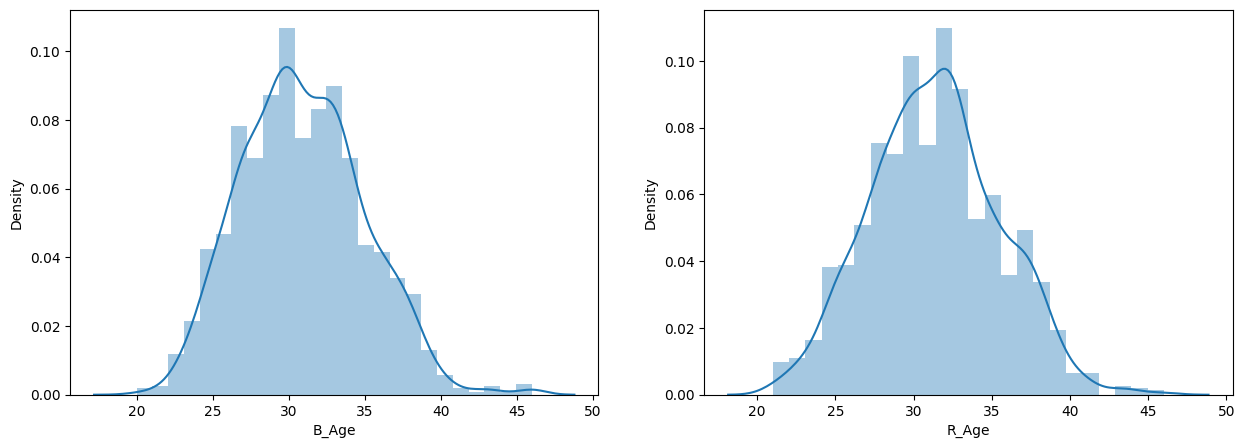

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.distplot(df.B_Age, ax=ax[0])
sns.distplot(df.R_Age, ax=ax[1])

In [ ]:
BAge = df.groupby(['B_Age']).count()['winner']
BlueAge = BAge.sort_values(axis=0, ascending=False)
BlueAge.head(10)

B_Age
30.0    164
33.0    138
29.0    134
32.0    128
27.0    120
31.0    112
28.0    106
34.0    106
26.0     72
35.0     67
Name: winner, dtype: int64

In [ ]:
RAge = df.groupby(['R_Age']).count()['winner']
RedAge = RAge.sort_values(axis=0, ascending=False)
RedAge.tail(10)

R_Age
24.000000    25
23.000000    17
40.000000    10
41.000000    10
22.000000    10
21.000000     5
43.000000     4
44.000000     3
46.000000     2
31.380081     1
Name: winner, dtype: int64

Text(0.5, 1.0, 'Age of Red fighters')

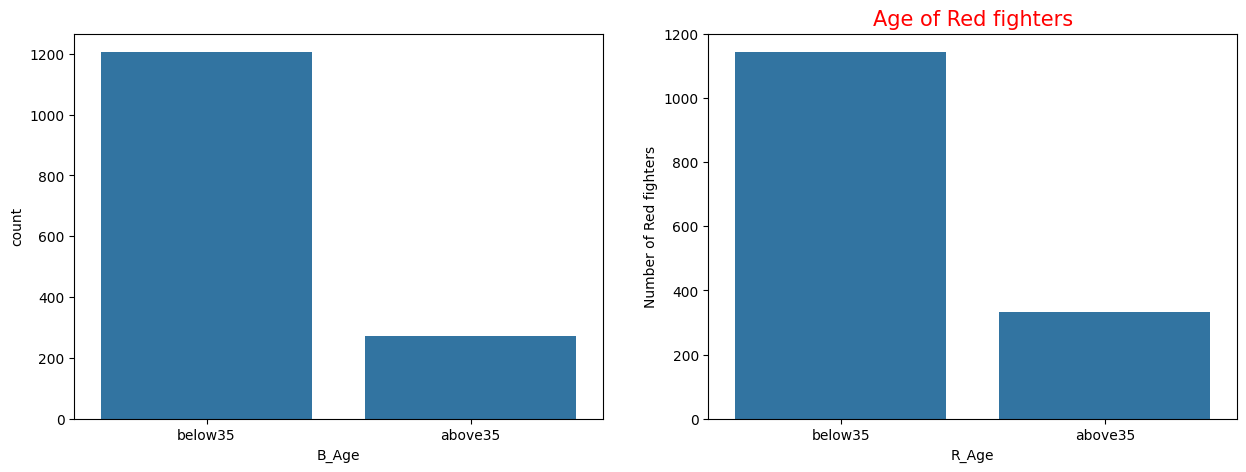

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
above35 =['above35' if i >= 35 else 'below35' for i in df.B_Age]
df_B = pd.DataFrame({'B_Age':above35})
sns.countplot(x=df_B.B_Age, ax=ax[0])
plt.ylabel('Number of fighters')
plt.title('Age of Blue fighters',color = 'blue',fontsize=15)

above35 =['above35' if i >= 35 else 'below35' for i in df.R_Age]
df_R = pd.DataFrame({'R_Age':above35})
sns.countplot(x=df_R.R_Age, ax=ax[1])
plt.ylabel('Number of Red fighters')
plt.title('Age of Red fighters',color = 'Red',fontsize=15)

In [ ]:
df['Age_Difference'] = df.B_Age - df.R_Age
df[['Age_Difference', 'winner']].groupby('winner').mean()

,Age_Difference
winner,
blue,-1.459711
draw,-1.555556
no contest,0.058824
red,0.273304


<Axes: xlabel='R_Height', ylabel='Density'>

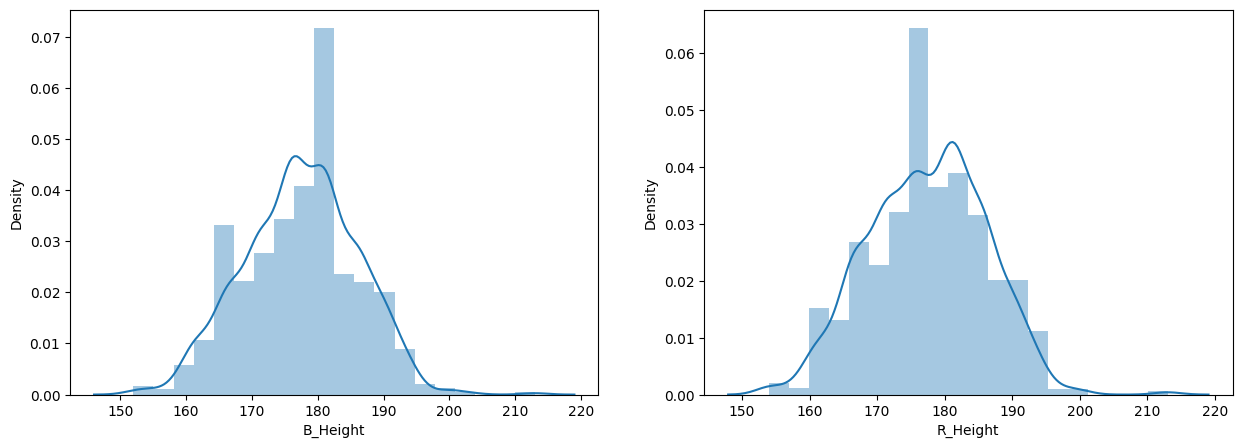

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.distplot(df.B_Height, bins = 20, ax=ax[0])
sns.distplot(df.R_Height, bins = 20, ax=ax[1])

<Axes: xlabel='B_Height', ylabel='Density'>

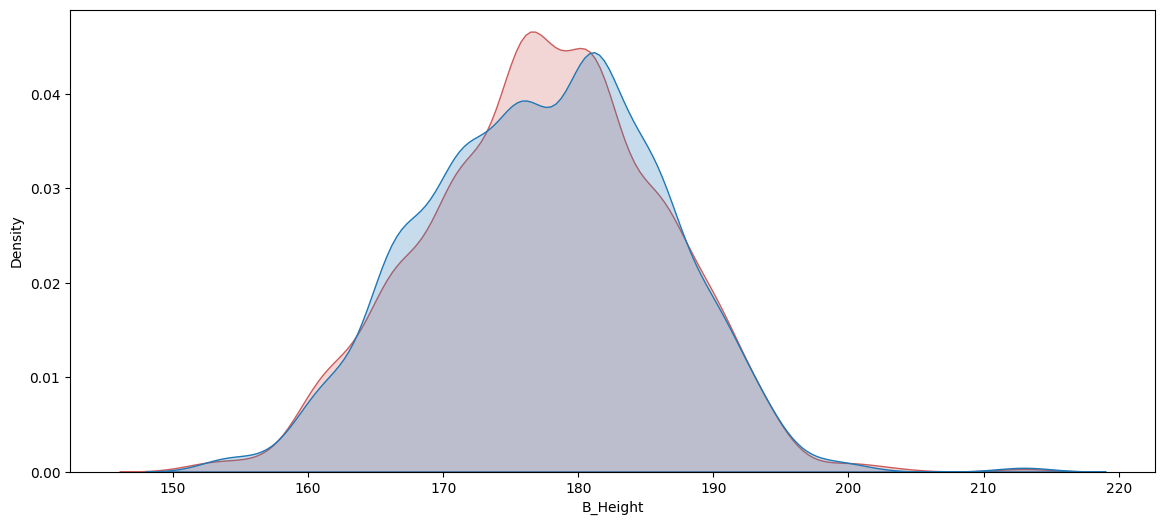

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(df.B_Height, shade=True, color='indianred', label='Red')
sns.kdeplot(df.R_Height, shade=True, label='Blue')

In [ ]:
df['Height Difference'] = df.B_Height - df.R_Height
df[['Height Difference', 'winner']].groupby('winner').mean()

,Height Difference
winner,
blue,0.118151
draw,2.444444
no contest,-1.411765
red,-0.052536


In [ ]:

temp = df["winby"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      #"name": "Types of Loans",
      #"hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    },

    ],
  "layout": {
        "title":"How the fighter's are winning?",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Win by",
                "x": 0.50,
                "y": 0.5
            }

        ]
    }
}
iplot(fig, filename='donut')

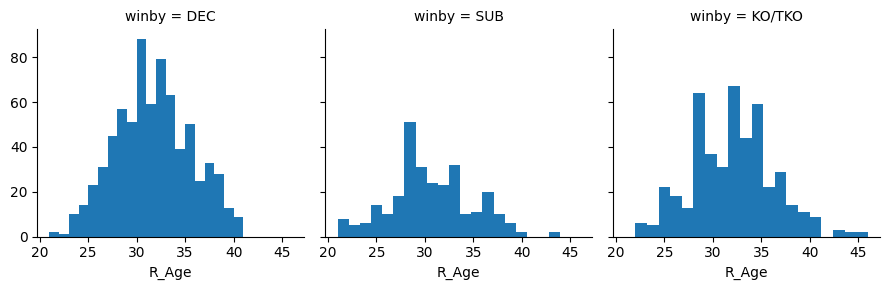

In [ ]:
g = sns.FacetGrid(df, col='winby')
g.map(plt.hist, 'R_Age', bins=20)

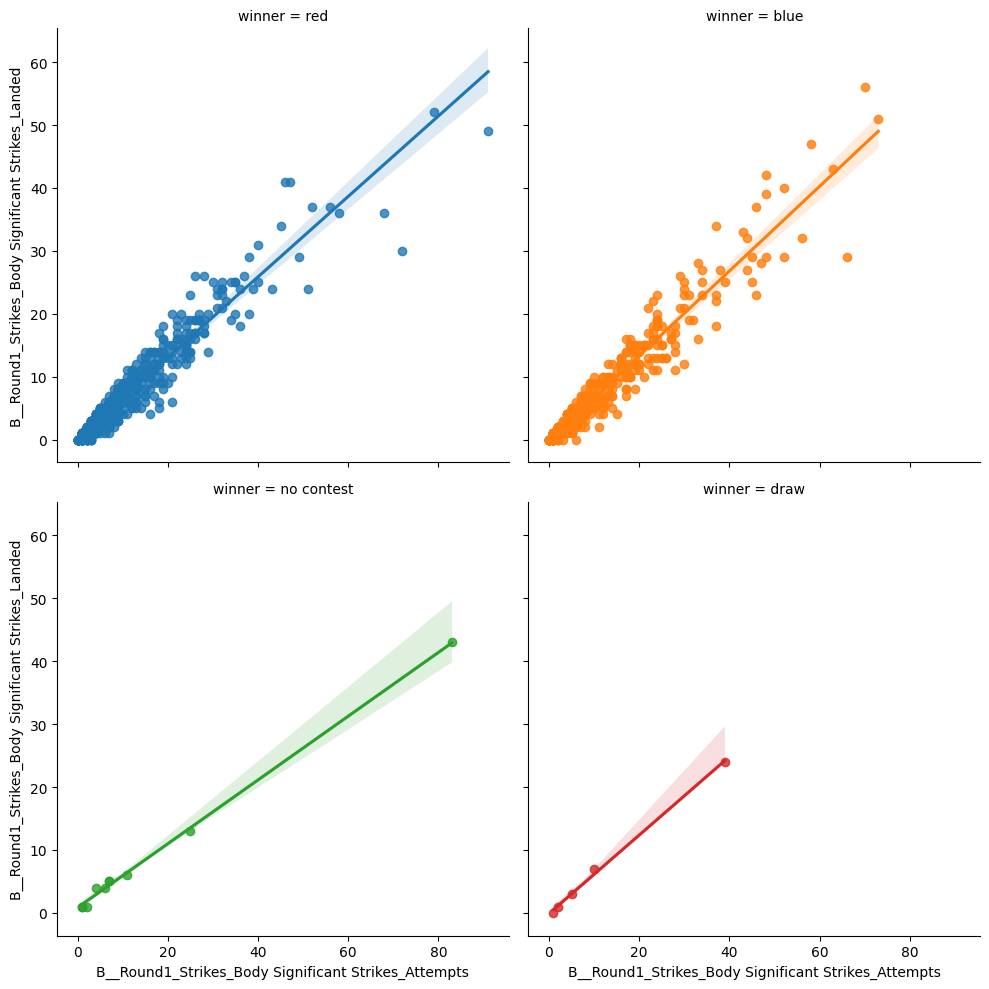

In [ ]:
sns.lmplot(x="B__Round1_Strikes_Body Significant Strikes_Attempts",
               y="B__Round1_Strikes_Body Significant Strikes_Landed",
               col="winner", hue="winner", data=df, col_wrap=2)

In [ ]:
cnt_srs = df['R_Location'].value_counts().head(15)

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
    ),
)

layout = go.Layout(
    title='Most Popular cities for Red fighters'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename="Ratio")

In [ ]:
cnt_srs = df['B_Location'].value_counts().head(15)

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
    ),
)

layout = go.Layout(
    title='Most Popular cities for Blue fighters'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename="Ratio")

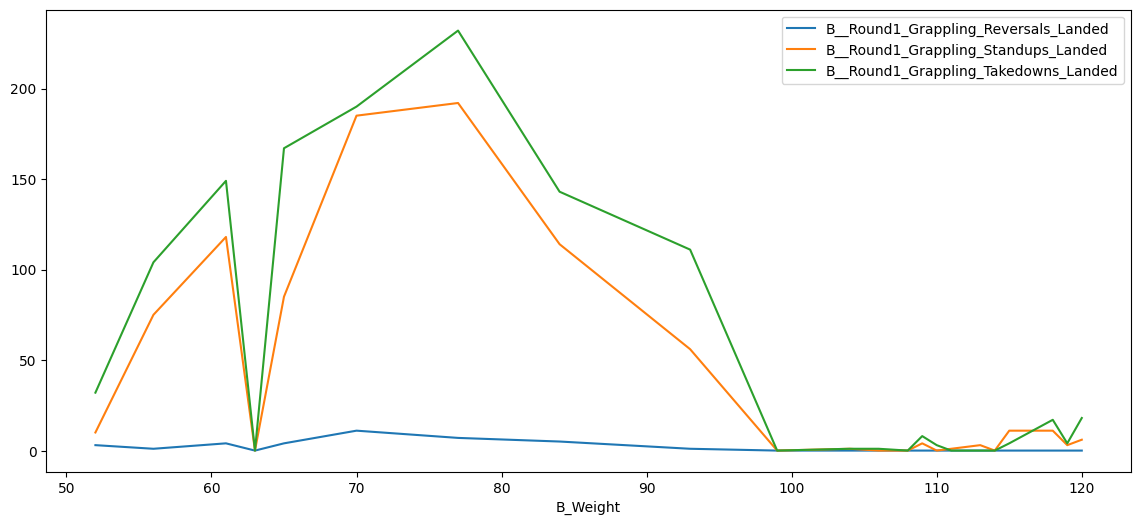

In [ ]:
r1 = df[['B_Weight', 'B__Round1_Grappling_Reversals_Landed', 'B__Round1_Grappling_Standups_Landed',
    'B__Round1_Grappling_Takedowns_Landed']].groupby('B_Weight').sum()

r1.plot(kind='line', figsize=(14,6))
plt.show()

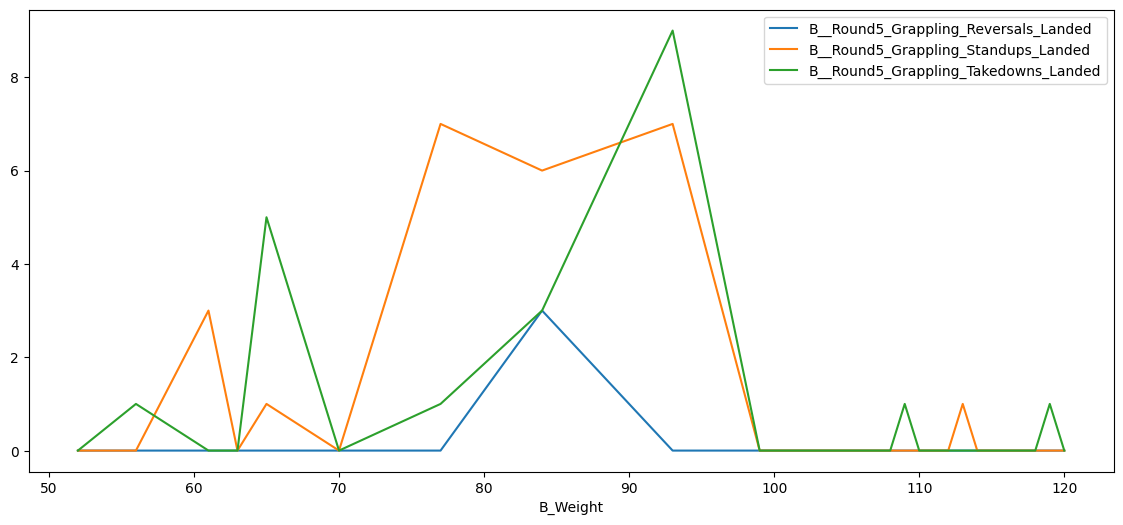

In [ ]:
r5 = df[['B_Weight', 'B__Round5_Grappling_Reversals_Landed', 'B__Round5_Grappling_Standups_Landed', 'B__Round5_Grappling_Takedowns_Landed']].groupby('B_Weight').sum()

r5.plot(kind='line', figsize=(14,6))
plt.show()

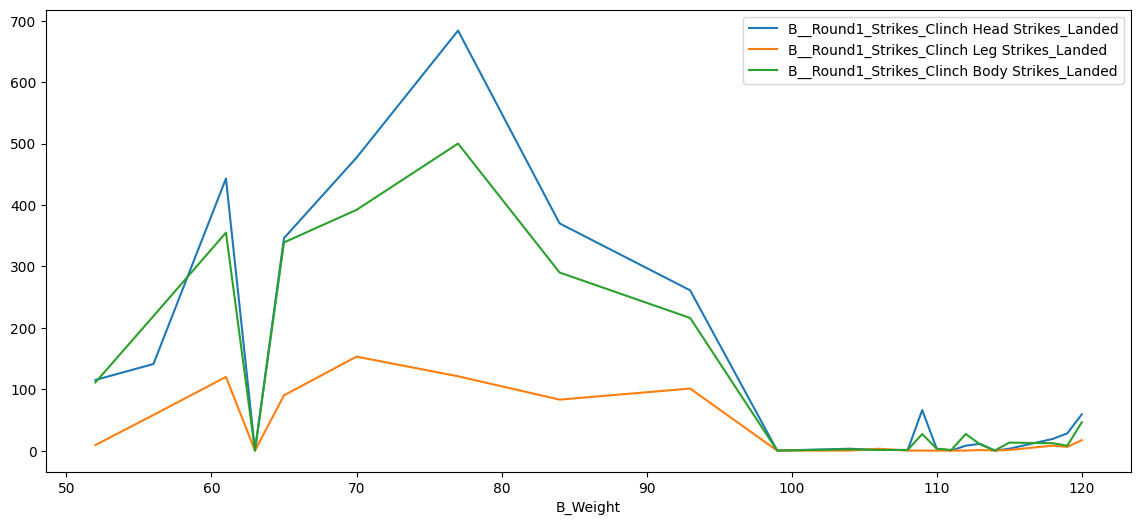

In [ ]:
clin_r1 = df[['B_Weight', 'B__Round1_Strikes_Clinch Head Strikes_Landed', 'B__Round1_Strikes_Clinch Leg Strikes_Landed', 'B__Round1_Strikes_Clinch Body Strikes_Landed']].groupby('B_Weight').sum()

clin_r1.plot(kind='line', figsize=(14,6))
plt.show()

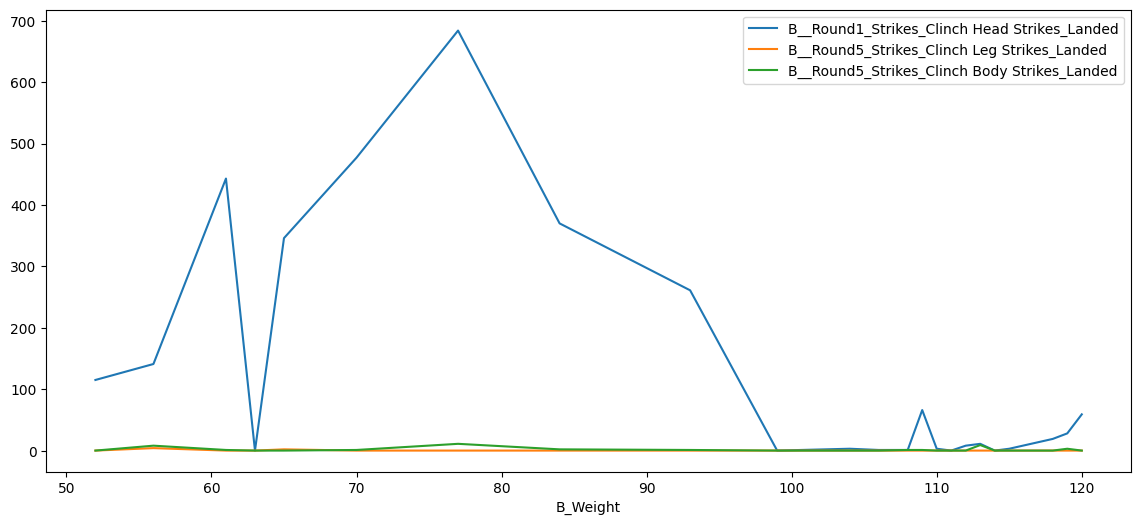

In [ ]:
clin_r5= df[['B_Weight', 'B__Round1_Strikes_Clinch Head Strikes_Landed', 'B__Round5_Strikes_Clinch Leg Strikes_Landed', 'B__Round5_Strikes_Clinch Body Strikes_Landed']].groupby('B_Weight').sum()

clin_r5.plot(kind='line', figsize=(14,6))
plt.show()